In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('Online Retail.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [3]:
df = df.dropna(subset=['CustomerID'])  ### Remove customer with no customer ID

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
df = df.loc[df["Quantity"]>0]

In [10]:
df.shape

(397924, 8)

In [18]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate) ### converting invoice date from object type to date type

## RFM - Recency ,Frequency and Monetry

### Monetry Value

In [26]:
df['CustomerID'].nunique()

4339

In [23]:
Monetry = df.groupby("CustomerID").Sales.sum()

In [34]:
Monetry = Monetry.reset_index()
Monetry

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


### Frequency Value

In [35]:
freq = df.groupby('CustomerID').InvoiceNo.count()  ### How frequently does the customer visits

In [36]:
freq = freq.reset_index()

In [37]:
freq

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


### Recency

In [28]:
### How many days back from the present date the customer made the last purchase
max_date = max(df.InvoiceDate) + pd.DateOffset(days = 1)
max_date

Timestamp('2011-12-11 17:19:00')

In [30]:
df['Difference'] = max_date - df.InvoiceDate

In [31]:
recency = df.groupby('CustomerID').Difference.min()
recency = recency.reset_index()
recency

,CustomerID,Difference
0,12346.0,327 days 07:18:00
1,12347.0,41 days 04:54:00
2,12348.0,77 days 04:06:00
3,12349.0,20 days 07:28:00
4,12350.0,312 days 01:18:00
...,...,...
4334,18280.0,161 days 07:27:00
4335,18281.0,5 days 06:26:00
4336,18282.0,217 days 03:44:00
4337,18283.0,11 days 04:20:00


In [32]:
recency.Difference = recency.Difference.dt.days
recency

,CustomerID,Difference
0,12346.0,327
1,12347.0,41
2,12348.0,77
3,12349.0,20
4,12350.0,312
...,...,...
4334,18280.0,161
4335,18281.0,5
4336,18282.0,217
4337,18283.0,11


### Merge Monetry and Frequency

In [38]:
MF = Monetry.merge(freq, on = 'CustomerID')

In [43]:
MF

,CustomerID,Sales,InvoiceNo
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4334,18280.0,180.60,10
4335,18281.0,80.82,7
4336,18282.0,178.05,12
4337,18283.0,2094.88,756


### Merge MF and Recency

In [42]:
RFM = MF.merge(recency, on = 'CustomerID')
RFM.columns = ['CustomerID', 'Sales', 'Frequency', 'Recency']

In [43]:
RFM

,CustomerID,Sales,Frequency,Recency
0,12346.0,77183.60,1,327
1,12347.0,4310.00,182,41
2,12348.0,1797.24,31,77
3,12349.0,1757.55,73,20
4,12350.0,334.40,17,312
...,...,...,...,...
4334,18280.0,180.60,10,161
4335,18281.0,80.82,7,5
4336,18282.0,178.05,12,217
4337,18283.0,2094.88,756,11


### Standard Scaler
Scale Data to Same Range for R F M

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
### Out = (X-mean)/std(date)

In [45]:
RFM_New = scaler.fit_transform(RFM)
RFM_New

array([[-1.71571803e+00,  8.35963391e+00, -3.96512139e-01,
         1.91695604e+00],
       [-1.71513721e+00,  2.51046358e-01,  3.94687670e-01,
        -5.68647438e-01],
       [-1.71455638e+00, -2.85464504e-02, -2.65374049e-01,
        -2.55774273e-01],
       ...,
       [ 1.73205446e+00, -2.08712435e-01, -3.48428173e-01,
         9.60954701e-01],
       [ 1.73263529e+00,  4.57171586e-03,  2.90379646e+00,
        -8.29375075e-01],
       [ 1.73495859e+00, -2.40912314e-02, -9.48945321e-02,
        -9.16284288e-01]])

## Apply K-Means with Some K

In [47]:
from sklearn.cluster import KMeans

In [48]:
SSD = []
K = []
for i in range(2,15):
    model = KMeans(n_clusters=i)
    model.fit(RFM_New)
    SSD.append(model.inertia_)
    K.append(i)

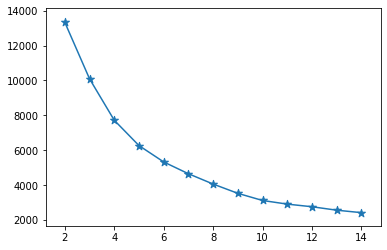

In [49]:
plt.plot(K,SSD)
plt.scatter(K,SSD, marker='*',s = 70)
plt.show()

In [50]:
model = KMeans(n_clusters=5)
Cluster_Id = model.fit_predict(RFM_New)

In [51]:
### Changed to scaler for ease of calculation
RFM["Cluster_Id"] = Cluster_Id

In [52]:
RFM.Cluster_Id.unique()

array([1, 3, 2, 4, 0])

In [53]:
all_sales = RFM.groupby('Cluster_Id').Sales.mean()

In [54]:
all_freq = RFM.groupby('Cluster_Id').Frequency.mean()

In [55]:
all_recency = RFM.groupby('Cluster_Id').Recency.mean()

In [56]:
final_data = pd.DataFrame({
    'Cluster_Id': [0, 1, 3, 2, 4],
    'Sales' : all_sales,
    'Frequency' : all_freq,
    'Recency' : all_recency
})

In [58]:
final_data

,Cluster_Id,Sales,Frequency,Recency
Cluster_Id,,,,
0,0,1812.457651,97.930612,59.790087
1,1,2222.424308,101.238448,61.171135
2,3,176606.164286,847.142857,20.571429
3,2,450.219674,27.140698,292.863953
4,4,70925.287500,5807.750000,5.000000


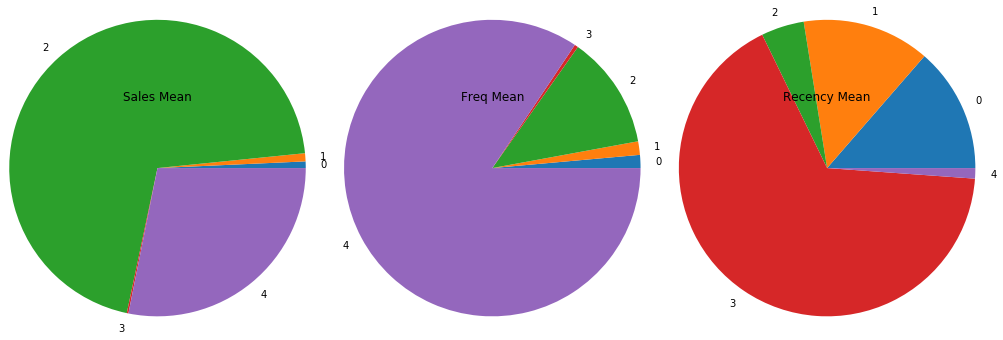

In [59]:
fig = plt.figure(figsize = (17,5))
ax = fig.add_subplot(2,3,1)
plt.title('Sales Mean')
ax.pie(final_data.Sales , labels = [0,1,2,3,4], radius =3)

ax = fig.add_subplot(2,3,2)
plt.title('Freq Mean')
ax.pie(final_data.Frequency , labels = [0,1,2,3,4], radius =3)

ax = fig.add_subplot(2,3,3)
plt.title('Recency Mean')
ax.pie(final_data.Recency , labels = [0,1,2,3,4], radius =3)

plt.show()